## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [14]:
import nltk
corpus = open('data/lenta.txt', encoding="utf8").read()
corpus[:1000]

'Бои у Сопоцкина и Друскеник закончились отступлением германцев. Неприятель, приблизившись с севера к Осовцу начал артиллерийскую борьбу с крепостью. В артиллерийском бою принимают участие тяжелые калибры. С раннего утра 14 сентября огонь достиг значительного напряжения. Попытка германской пехоты пробиться ближе к крепости отражена. В Галиции мы заняли Дембицу. Большая колонна, отступавшая по шоссе от Перемышля к Саноку, обстреливалась с высот нашей батареей и бежала, бросив парки, обоз и автомобили. Вылазки гарнизона Перемышля остаются безуспешными. При продолжающемся отступлении австрийцев обнаруживается полное перемешивание их частей, захватываются новые партии пленных, орудия и прочая материальная часть. На перевале Ужок мы разбили неприятельский отряд, взяли его артиллерию и много пленных и, продолжая преследовать, вступили в пределы Венгрии. \n«Русский инвалид», 16 сентября 1914 года.Министерство народного просвещения, в виду происходящих чрезвычайных событий, признало соответств

In [15]:
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
russian_stopwords = stopwords.words('russian')

In [16]:
# функция для построения списка нграмм
def ngrammer(tokens, n=2):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [17]:
# первый способ
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match(r'\W+', token)] for sentence in tokenized_sentences]
tokenized_sentences[:2]

[['бои',
  'у',
  'сопоцкина',
  'и',
  'друскеник',
  'закончились',
  'отступлением',
  'германцев'],
 ['неприятель',
  'приблизившись',
  'с',
  'севера',
  'к',
  'осовцу',
  'начал',
  'артиллерийскую',
  'борьбу',
  'с',
  'крепостью']]

In [18]:
bigrams_counts_sw = Counter()
for sentence in tokenized_sentences:
    bigrams_counts_sw.update(ngrammer([token for token in sentence if token not in russian_stopwords]))
bigrams_counts_sw.most_common(20)

[('риа новости', 3501),
 ('сообщает риа', 1325),
 ('настоящее время', 769),
 ('миллионов долларов', 679),
 ('2000 года', 571),
 ('передает риа', 568),
 ('1999 года', 544),
 ('владимир путин', 519),
 ('федеральных сил', 492),
 ('эхо москвы', 488),
 ('таким образом', 483),
 ('президента россии', 476),
 ('северном кавказе', 474),
 ('внутренних дел', 456),
 ('сообщает интерфакс', 422),
 ('новости ссылкой', 408),
 ('сообщает агентство', 343),
 ('ближайшее время', 339),
 ('сообщили риа', 332),
 ('сих пор', 330)]

In [19]:
# второй способ
tokens = word_tokenize(corpus)
tokens = [token.lower() for token in tokens if not re.match(r'\W+', token)]
tokens[:10]

['бои',
 'у',
 'сопоцкина',
 'и',
 'друскеник',
 'закончились',
 'отступлением',
 'германцев',
 'неприятель',
 'приблизившись']

In [20]:
bigrams_counts_w = Counter()
bigrams_counts_w.update(ngrammer([token for token in tokens if token not in russian_stopwords]))
bigrams_counts_w.most_common(20)

[('риа новости', 3501),
 ('сообщает риа', 1325),
 ('настоящее время', 769),
 ('миллионов долларов', 679),
 ('2000 года', 571),
 ('передает риа', 568),
 ('1999 года', 544),
 ('владимир путин', 519),
 ('федеральных сил', 492),
 ('эхо москвы', 488),
 ('таким образом', 483),
 ('президента россии', 476),
 ('северном кавказе', 474),
 ('внутренних дел', 456),
 ('сообщает интерфакс', 422),
 ('новости ссылкой', 408),
 ('сообщает агентство', 343),
 ('ближайшее время', 339),
 ('сообщили риа', 332),
 ('сих пор', 330)]

In [21]:
# print(bigrams_counts_sw.most_common(20))
# print(bigrams_counts_w.most_common(20))
print("способ 1\t\t\t\tспособ 2")
for i in range(20):
    # print(f"{bigrams_counts_sw.most_common(20)[i]}\t\t\t{bigrams_counts_w.most_common(20)[i]}")
    print(bigrams_counts_sw.most_common(20)[i],"\t\t\t",bigrams_counts_w.most_common(20)[i])

способ 1				способ 2
('риа новости', 3501) 			 ('риа новости', 3501)
('сообщает риа', 1325) 			 ('сообщает риа', 1325)
('настоящее время', 769) 			 ('настоящее время', 769)
('миллионов долларов', 679) 			 ('миллионов долларов', 679)
('2000 года', 571) 			 ('2000 года', 571)
('передает риа', 568) 			 ('передает риа', 568)
('1999 года', 544) 			 ('1999 года', 544)
('владимир путин', 519) 			 ('владимир путин', 519)
('федеральных сил', 492) 			 ('федеральных сил', 492)
('эхо москвы', 488) 			 ('эхо москвы', 488)
('таким образом', 483) 			 ('таким образом', 483)
('президента россии', 476) 			 ('президента россии', 476)
('северном кавказе', 474) 			 ('северном кавказе', 474)
('внутренних дел', 456) 			 ('внутренних дел', 456)
('сообщает интерфакс', 422) 			 ('сообщает интерфакс', 422)
('новости ссылкой', 408) 			 ('новости ссылкой', 408)
('сообщает агентство', 343) 			 ('сообщает агентство', 343)
('ближайшее время', 339) 			 ('ближайшее время', 339)
('сообщили риа', 332) 			 ('сообщили риа'

В топе 20-ти наиболее частотных нграмм различий нет.

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

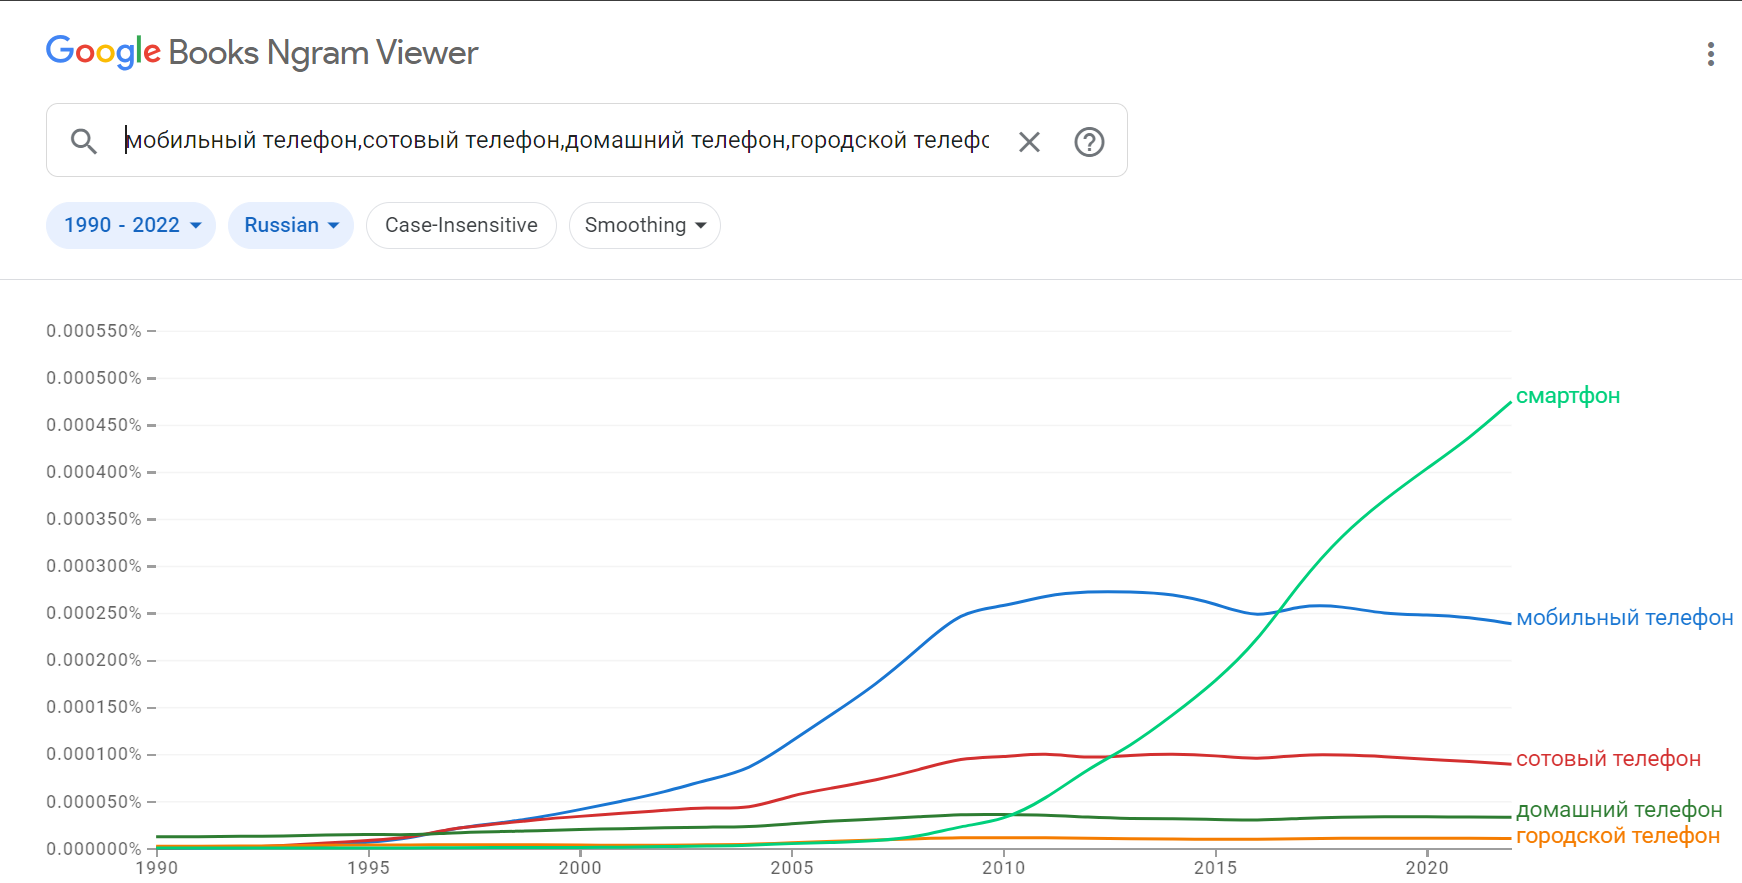

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [22]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [23]:
def ngrammer1(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [24]:
def collect_stats(tokenized_sentences, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in tokenized_sentences:
        unigrams.update(sent)
        bigrams.update(ngrammer1(sent, 2, stops))
    
    return unigrams, bigrams

In [28]:
# with min_count
import math
def scorer_pmi(word_count_a, word_count_b, corpus_count, bigrams_count, min_count=0):
    try:
        prob_a = word_count_a/corpus_count
        prob_b = word_count_b/corpus_count    
        pmi = math.log((bigrams_count-min_count/corpus_count)/(prob_a*prob_b),2)
    except ZeroDivisionError:
        return 0
    return pmi

In [29]:
# with min count
def score_bigrams_pmi(unigrams, bigrams, corpus_count, scorer_pmi, threshold=-100000, min_count=0):
    bigram2score = Counter()

    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer_pmi(unigrams[word_a],unigrams[word_b],corpus_count,bigrams[bigram], min_count)
    ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    return bigram2score

In [38]:
def score_bigrams_simple(unigrams, bigrams, scorer, threshold=-100000):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], 
                       bigrams[bigram])
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

In [41]:
unigrams, bigrams = collect_stats(tokenized_sentences,russian_stopwords)
bigrams_score_pmi = score_bigrams_pmi(unigrams, bigrams, len(tokens), scorer_pmi)
bigrams_score_simple = score_bigrams(unigrams, bigrams, scorer_simple)

In [45]:
bigrams_score_simple.most_common(20)

[('сопоцкина друскеник', 0.5),
 ('неприятель приблизившись', 0.5),
 ('саноку обстреливалась', 0.5),
 ('м.ю лермонтова', 0.5),
 ('австрийский аэроплан', 0.5),
 ('показывался аэроплан-птица', 0.5),
 ('das ist', 0.5),
 ('ist nesteroff', 0.5),
 ('песнь нестерове', 0.5),
 ('могучий унесся', 0.5),
 ('шумели лязгали', 0.5),
 ('зловеще гремели.и', 0.5),
 ('гремели.и пламенно', 0.5),
 ('жаждали битвы…величие', 0.5),
 ('равнине обманчиво-зыбкой.презрение', 0.5),
 ('воздушнойи дрогнуло', 0.5),
 ('пружина стальная', 0.5),
 ('решенье созреломгновенье', 0.5),
 ('спрятанными ошейнике', 0.5),
 ('ошейнике шифрованные', 0.5)]

In [46]:
bigrams_score_pmi.most_common(20)

[('сопоцкина друскеник', 41.02113625570837),
 ('неприятель приблизившись', 41.02113625570837),
 ('саноку обстреливалась', 41.02113625570837),
 ('м.ю лермонтова', 41.02113625570837),
 ('австрийский аэроплан', 41.02113625570837),
 ('показывался аэроплан-птица', 41.02113625570837),
 ('das ist', 41.02113625570837),
 ('ist nesteroff', 41.02113625570837),
 ('песнь нестерове', 41.02113625570837),
 ('могучий унесся', 41.02113625570837),
 ('шумели лязгали', 41.02113625570837),
 ('зловеще гремели.и', 41.02113625570837),
 ('гремели.и пламенно', 41.02113625570837),
 ('жаждали битвы…величие', 41.02113625570837),
 ('равнине обманчиво-зыбкой.презрение', 41.02113625570837),
 ('воздушнойи дрогнуло', 41.02113625570837),
 ('пружина стальная', 41.02113625570837),
 ('решенье созреломгновенье', 41.02113625570837),
 ('спрятанными ошейнике', 41.02113625570837),
 ('ошейнике шифрованные', 41.02113625570837)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы